<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/Introduction/Fashion_MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the environment

**TensorFlow** is an open-source machine learning framework developed by the Google Brain team. It is widely used for various machine learning and deep learning tasks. **TensorFlow** is particularly popular for deep learning applications, such as image and speech recognition, natural language processing, and generative models.

*Make sure that TensorFlow is installed on your notebook.*

Import all the necessary libraries for this project, including TensorFlow for the main framework, Matplotlib for visualization, scikit-learn (sklearn.metrics) for evaluation, NumPy for data manipulation, and itertools for iterating through the data.

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load, split, and process the data

The **Fashion MNIST** dataset is a widely used benchmark dataset for image classification tasks. It contains 60,000 training images and 10,000 test images, each of which is a grayscale 28x28 pixel image belonging to one of ten fashion-related categories, such as T-shirts, dresses, shoes, and bags. This dataset serves as a replacement for the traditional MNIST dataset, offering more complexity and relevance for real-world computer vision applications. Researchers and practitioners use **Fashion MNIST** to assess and develop machine learning models for fashion and clothing recognition tasks, making it a valuable resource for testing and prototyping in the field of computer vision.
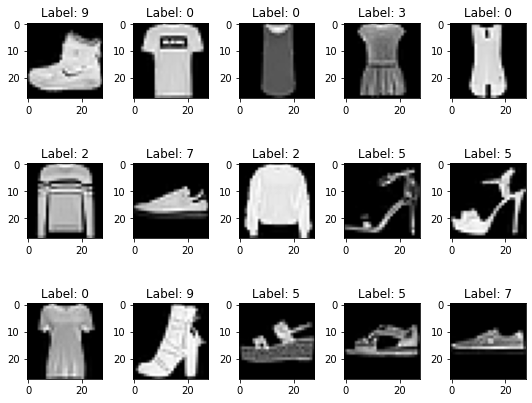

Load in the data
Split it into train and test sets
Transform input values to [0 , 1].

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
K = len(set(y_train))

# Build the model

The model is a feedforward neural network with a topology of 784 input units and 10 output units. ReLU is used as the activation function in the hidden layer, while softmax is employed in the output layer.

You can use various layer types to design a feedforward deep learning model in TensorFlow. Some of the commonly used layers include:


*   Input layer: It's a fundamental layer for specifying the shape and type of input data. The Input layer is typically the first layer of your neural network model.
*   Dense Layer (Fully Connected Layer): It connects each neuron in one layer to every neuron in the next layer. You can define the number of units (neurons) and activation functions in this layer.
*   Dropout Layer: It helps prevent overfitting by randomly setting a fraction of input units to 0 during training.
*   Activation Layer: This layer applies an activation function to the output of the previous layer.
*   BatchNormalization Layer: It normalizes the activations of the previous layer to make training more stable and efficient.
*   Flatten Layer: It reshapes the input data to a one-dimensional tensor, which is often used before transitioning from convolutional layers to fully connected layers.

*Note: The specific layers you choose and their configurations depend on the nature of your problem and your network architecture. You can stack these layers together to create a feedforward deep learning model.*

*Note: The activation function in the final layer of your neural network should be chosen according to the nature of your problem. For regression tasks, a linear activation function is typically used. In the case of binary classification, the sigmoid activation function is commonly employed. For multiclass classification problems, the softmax activation function is a suitable choice.*

Source: https://www.tensorflow.org/

In [10]:
i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(784, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

# Compile the model

In TensorFlow, when compiling a model, you typically specify an optimizer, a loss function, and one or more metrics. Here are some commonly used optimizers, loss functions, and metrics:

Optimizers:
1.   SGD (Stochastic Gradient Descent): Classic optimization algorithm.
2.   Adam: A popular adaptive learning rate optimization algorithm.
3.   RMSprop: Another adaptive learning rate optimization algorithm.
4.   Adagrad: Adapts the learning rates individually for each parameter.

Loss Functions:
1.   Mean Squared Error (MSE): Commonly used for regression problems.
2.   Binary Cross-Entropy: Used for binary classification tasks.
3.   Categorical Cross-Entropy: Suitable for multiclass classification.
4.   Sparse Categorical Cross-Entropy: Used when your targets are integers (e.g., class indices).
5.   Kullback-Leibler Divergence (KLD): Used in variational autoencoders and other probabilistic models.

Metrics:
1.   Accuracy: Commonly used for classification tasks.
2.   Precision: Measures the true positive rate in binary classification.
3.   Recall: Measures the ability to find all relevant instances in binary classification.
4.   F1 Score: Combines precision and recall into a single metric.
5.   Mean Absolute Error (MAE): Useful for regression problems.
6.   Mean Squared Error (MSE): Another metric for regression tasks.
7.   Categorical Accuracy: Used for multiclass classification.

You can choose the appropriate optimizer, loss function, and metrics based on your specific task and model architecture.

Source: https://www.tensorflow.org/


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

The tensorflow.keras.models.Model.fit function accepts various parameters to configure the training of a neural network model. Some of the most commonly used parameters include:
*   x: The input data, usually as a NumPy array or a TensorFlow tensor.
*   y: The target data (labels) that the model is learning to predict.
*   batch_size: The number of samples per gradient update.
*   epochs: The number of training iterations over the entire dataset.
*   validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
*   callbacks: A list of callback objects that perform actions at various stages during training.
*   verbose: Verbosity mode (0, 1, or 2) controlling the amount of information printed during training.
*   shuffle: A boolean indicating whether to shuffle the training data before each epoch.
*   initial_epoch: The epoch at which to start training (useful for resuming a previous training session).
*   steps_per_epoch: The number of batches to draw from the generator at each epoch.
*   validation_steps: The number of batches to draw from the generator for validation.

There are additional parameters for more advanced use cases, such as class weight, sample weight, and more, but the above list covers the basic parameters for training a model. You can refer to the TensorFlow documentation for more details and specific parameter options.

Source: https://www.tensorflow.org/

In [13]:
response = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 12s 3ms/step - loss: 0.4959 - accuracy: 0.8228 - val_loss: 0.4290 - val_accuracy: 0.8428
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3821 - accuracy: 0.8598 - val_loss: 0.3859 - val_accuracy: 0.8626
Epoch 3/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3474 - accuracy: 0.8712 - val_loss: 0.3838 - val_accuracy: 0.8575
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3270 - accuracy: 0.8794 - val_loss: 0.3702 - val_accuracy: 0.8674
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.8838 - val_loss: 0.3632 - val_accuracy: 0.8682
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2999 - accuracy: 0.8875 - val_loss: 0.3451 - val_accuracy: 0.8795
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2875 - accuracy: 0.8932 - val_loss: 0.3500 - val_accuracy: 0.87

# Evaluate the model

Visualize the model's performance on both the training and validation datasets. The return variable from the model.fit() function contains valuable information about the model's performance throughout the training process.

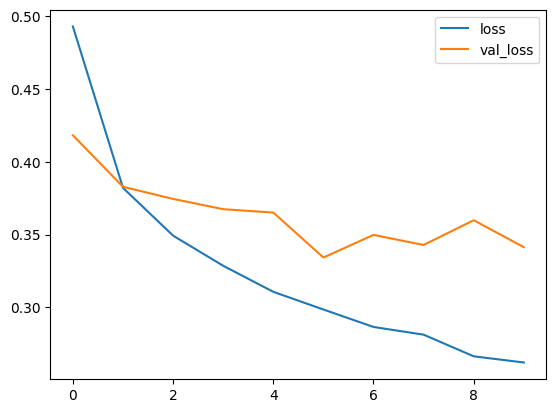

In [7]:
plt.plot(response.history['loss'], label='loss')
plt.plot(response.history['val_loss'], label='val_loss')
plt.legend()

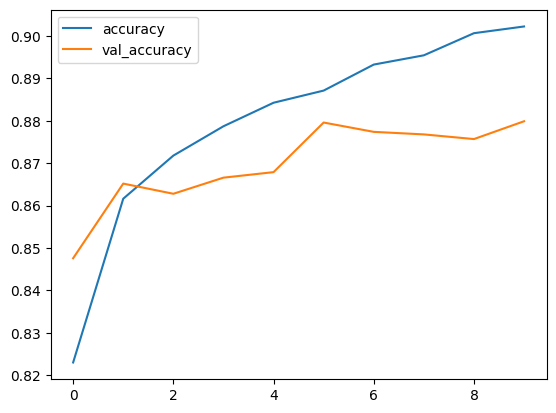

In [8]:
plt.plot(response.history['accuracy'], label='accuracy')
plt.plot(response.history['val_accuracy'], label='val_accuracy')
plt.legend()

This utility function plots a confusion matrix to evaluate the classification model's performance on the test dataset.

313/313 [==============================] - 1s 2ms/step


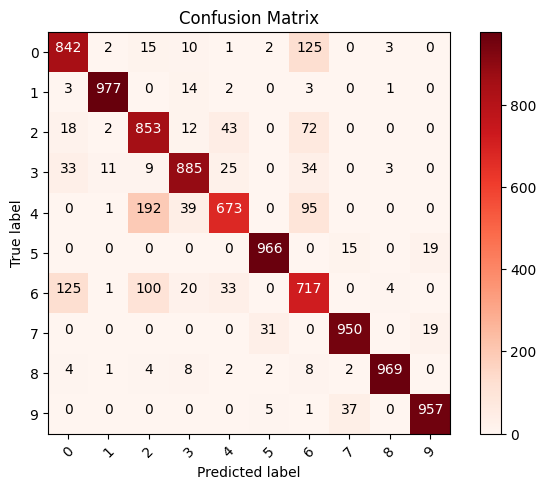

In [14]:
def plot_metrics(cm, classes, cmap=plt.cm.Reds):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title("Confusion Matrix")
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], 'd'),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_metrics(cm, list(range(10)))

The tensorflow.keras.models.Model.evaluate() function is used to evaluate the model's performance on a given dataset, typically a test dataset. It computes and returns a set of evaluation metrics, such as accuracy, loss, or any other specified metrics, to assess how well the model is performing. The function takes the input data and corresponding target labels as arguments and computes the model's predictions on the input data. It then compares these predictions to the actual target labels to calculate the specified metrics. This provides valuable insights into the model's accuracy and performance on unseen data. The function is commonly used to assess the model's generalization capabilities and to determine whether it is ready for deployment.

In [15]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8789
[0.3420183062553406, 0.8788999915122986]


# Examples of Misclassification

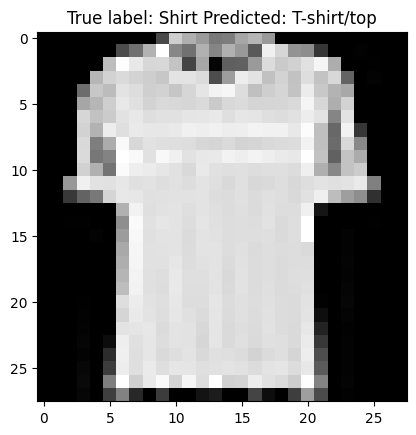

In [16]:
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));